<a href="https://colab.research.google.com/github/StephenJohnson-CardiffUni/Astro/blob/main/GalaxiesAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt



In [11]:
initialMass = 1e11 #10^11 is 1e11 in this system
print(initialMass)

100000000000.0


In [71]:
#Constants
SolarLumin = 3.828e26  # Solar luminosity in watts
SolarM = 2e30  # Solar mass in kilograms
Salpeter = 2.35
initialMass = 1e11

# Assuming a lower limit of 0.5 solar masses and an upper limit of some solar masses
StarMassMin = 0.5
StarMassMax = 150


def luminosity_func(M): #Takes mass in SolarM, returns in solar luminosities
  return (M)**3.9

def lifeTime_func(M): #Take Mass in SolarM, returns lifetime on main sequence
  return 1e9 * (M)**-2.5

def Mcrit(t): #Takes time in years, returns mass of stars whos life time is equal to this (the ones just dying in a galaxy t old)
  return ((10e9/t)**1/25)*SolarM

def IMFconst(MassTot):#function to find the IMF constant
  return MassTot / (quad(IMFintegrand,StarMassMin,StarMassMax)[0])

def IMFintegrand(m):#needed for the constant
  return m**-1.35

def IMF(M):#Gives distribution of masses from a cloud of certain size
  return IMFconst(initialMass) * (M/SolarM)**-Salpeter


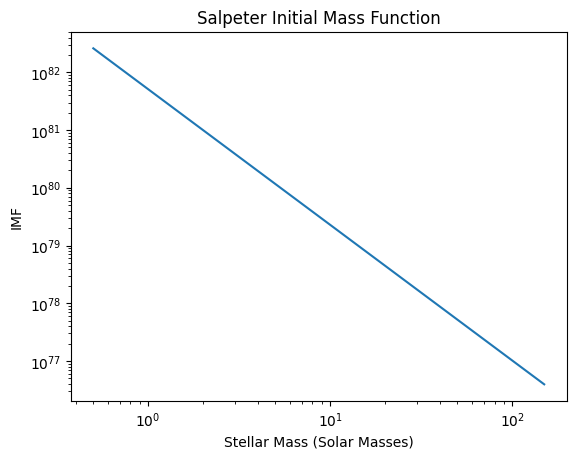

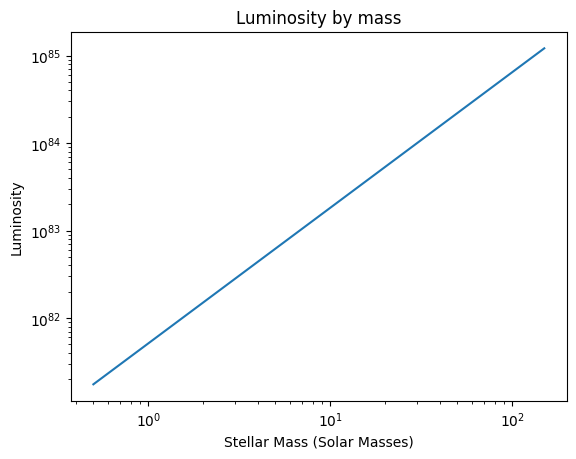

In [73]:
masses = np.linspace(StarMassMin, StarMassMax, num=1000) #TestMasses for Graphing

IMFvals = IMF(masses) # Mass Dristribution

lumsByMass = IMFvals*luminosity_func(masses) # IMF*luminositys | In Solar Lumins


#Plot the Initial Mass Function for sanity check
plt.plot(masses, IMFvals)
plt.xlabel('Stellar Mass (Solar Masses)')
plt.ylabel('IMF')
plt.title('Salpeter Initial Mass Function')
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.plot(masses, lumsByMass)
plt.xlabel('Stellar Mass (Solar Masses)')
plt.ylabel('Luminosity')
plt.title('Luminosity by mass')
plt.xscale('log')
plt.yscale('log')

In [74]:
luminosity_func(10)

7943.282347242814